## For what do we use all this??

See this [amazing visual presentation](http://jalammar.github.io/visual-numpy/):

* For matrix computation
* Data representation
* Audio
* Image
* Text



# Basic image manipulation in Python: NumPy and Scipy

Image can be understood as a 2D numerical array. Or 3D such as RGB, or MRI, etc. From now on, we will understand **image==np.array**

We will be using basically `numpy` for basic array manipulation and `scipy` with its `ndimage` submodule dedicated for image processing of n-dimensional images.


## Common tasks in image processing

* Input/Output, displaying images
* Basic manipulations: cropping, flipping, rotating, …
* Image filtering: denoising, sharpening
* Image segmentation: labeling pixels corresponding to different objects
* Classification
* Feature extraction
* Registration
* …

In [90]:
%matplotlib inline

## Opening and writing to image files

In [91]:
!pip install imageio

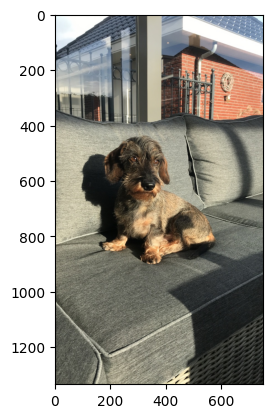

In [107]:
#import image chuck.png and show
import imageio
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np

chuck = imageio.v2.imread('chuck.JPG')

#show the image
plt.imshow(chuck)





In [96]:
imageio.show_formats()

TIFF - TIFF format [.tif .tiff .stk .lsm]
BMP-PIL - Windows Bitmap via Pillow [.bmp]
BUFR-PIL - BUFR via Pillow [.bufr]
CUR-PIL - Windows Cursor via Pillow [.cur]
DCX-PIL - Intel DCX via Pillow [.dcx]
DDS-PIL - DirectDraw Surface via Pillow [.dds]
DIB-PIL - Windows Bitmap via Pillow []
EPS-PIL - Encapsulated Postscript via Pillow [.ps .eps]
FITS-PIL - FITS via Pillow [.fit .fits]
FLI-PIL - Autodesk FLI/FLC Animation via Pillow [.fli .flc]
FPX-PIL - FlashPix via Pillow [.fpx]
FTEX-PIL - Texture File Format (IW2:EOC) via Pillow [.ftc .ftu]
GBR-PIL - GIMP brush file via Pillow [.gbr]
GIF-PIL - Compuserve GIF via Pillow [.gif]
GRIB-PIL - GRIB via Pillow [.grib]
HDF5-PIL - HDF5 via Pillow [.h5 .hdf]
ICNS-PIL - Mac OS icns resource via Pillow [.icns]
ICO-PIL - Windows Icon via Pillow [.ico]
IM-PIL - IFUNC Image Memory via Pillow [.im]
IMT-PIL - IM Tools via Pillow []
IPTC-PIL - IPTC/NAA via Pillow [.iim]
JPEG-PIL - JPEG (ISO 10918) via Pillow [.jfif .jpe .jpg .jpeg]
JPEG2000-PIL - JPEG 2000 

### Go from image to numpy array

In [99]:
chuck = imageio.imread('chuck.jpg')
type(chuck)

print("\n", chuck.shape, chuck.dtype)
plt.imshow(f)
plt.show()


/var/folders/gc/pq01pgrs2gjf3zqjxcb9p1j80000gn/T/ipykernel_9222/3318771292.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  face = imageio.imread('chuck.jpg')


imageio.core.util.Array


 (768, 1024, 3) uint8


In [ ]:
chuck

In [ ]:
def rgb_splitter(image):
    rgb_list = ['Reds','Greens','Blues']
    fig, ax = plt.subplots(1, 3, figsize=(15,5), sharey = True)
    for i in range(3):
        ax[i].imshow(image[:,:,i], cmap = rgb_list[i])
        ax[i].set_title(rgb_list[i], fontsize = 15)

In [ ]:
plt.imshow(chuck[:,:,1], cmap=plt.cm.gray)

In [ ]:
rgb_splitter(chuck)

In [ ]:
chuck_c = chuck.copy()

In [ ]:
chuck_c[:,:,1] = 150

In [ ]:
rgb_splitter(chuck_c)

In [ ]:
plt.imshow(chuck_c)

### Slicing the image

In [ ]:
chuck2 = chuck[400:500, 570:670]

In [ ]:
print("\n", chuck2.shape, chuck2.dtype)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(chuck2)
plt.show()

## Displaying images
We can pass the image as gray, so that we use it for basic image processing

In [ ]:
f = misc.chuck(gray=True)
import matplotlib.pyplot as plt
plt.imshow(f, cmap=plt.cm.gray)        


In [ ]:
f.shape

We can alter the data by clipping it. Either using plt.imshow() or np.clip(). This will alter the contrast for us.

In [ ]:
def convert_to_gray(image):
    # Y = red * 0.3 + green * 0.59 + blue * 0.11


In [ ]:
def convert_to_gray_vect(image):
    # Y = red * 0.3 + green * 0.59 + blue * 0.11


In [ ]:
chuck_grey = convert_to_gray_vect(chuck)

In [ ]:
plt.imshow(chuck_grey, cmap=plt.cm.gray)

In [ ]:
chuck_grey

In [ ]:
chuck_grey2 = convert_to_gray(chuck)
chuck_grey2

In [ ]:
np.zeros([f.shape[0],f.shape[1]])

In [ ]:
Y = red * 0.33 + green * 0.59 + blue * 0.11

### Contrast

In [ ]:
f_contrast = np.clip(f, 220, 230)

plt.imshow(f_contrast, cmap=plt.cm.gray)        

# Remove axes and ticks
plt.axis('off')


In [ ]:
f_contrast.max()

In [ ]:
f_contrast

In [ ]:
plt.imshow(f, cmap=plt.cm.gray, vmin=30, vmax=200)        

# Remove axes and ticks
plt.axis('off')

## Basic manipulations
Since we are working with arrays, we can perform basic slicing array operation manipulations over the image

In [2]:
# Retrieve a pixel value
chuck = misc.chuck(gray=True)
chuck[0, 40]

NameError: name 'misc' is not defined

In [3]:
# Slice an image
plt.figure(figsize=(6, 6))
plt.imshow(chuck[10:100, 20:100], cmap=plt.cm.gray)
plt.axis('off')

plt.show()

NameError: name 'face' is not defined

<Figure size 432x432 with 0 Axes>

In [ ]:
chuck[100:120]

In [ ]:
# Apply a mask
fm = chuck.copy()
fm[250:350,525:750] = 255

plt.figure(figsize=(6, 6))
plt.imshow(fm, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

## Statistical information

We can as well retrieve statistical information from the image

In [ ]:
chuck = misc.chuck(gray=True)

print("Mean ", chuck.mean(), "| Max ", chuck.max(), "| Min ", chuck.min())


## Geometrical transformation

We can as well transform the images, which is extremely important for data augmentation for instance.

### Cropping

In [ ]:
import numpy as np
import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt

chuck = scipy.misc.chuck(gray=True)

lx, ly = chuck.shape

# Cropping (using floor division, dumping decimals after operation)
crop_chuck = chuck[lx//5:-lx//4, ly//5:-ly//4]

plt.figure(figsize=(6, 6))
plt.imshow(crop_chuck, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

In [ ]:
crop_chuck.shape

## Flipping

In [ ]:
import numpy as np
import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt

chuck = scipy.misc.chuck(gray=True)

# Up-down flip
flip_ud_chuck = np.flipud(chuck)

plt.figure(figsize=(6, 6))
plt.imshow(flip_ud_chuck, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

In [ ]:
import numpy as np
import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt

chuck = scipy.misc.chuck(gray=True)

# Left right flip
flip_ud_chuck = np.flip(chuck, axis=1)

plt.figure(figsize=(6, 6))
plt.imshow(flip_ud_chuck, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

### Rotation


In [ ]:
import numpy as np
import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt

chuck = scipy.misc.chuck(gray=True)

# Rotation
rotate_chuck = ndimage.rotate(chuck, 45)

plt.figure(figsize=(6, 6))
plt.imshow(rotate_chuck, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

In [ ]:
import numpy as np
import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt

chuck = scipy.misc.chuck(gray=True)

# Rotation
rotate_chuck = ndimage.rotate(chuck, 45, reshape=False)

plt.figure(figsize=(6, 6))
plt.imshow(rotate_chuck, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

## Image filtering

### Blurring/smoothing

In [ ]:
import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt

chuck = scipy.misc.chuck(gray=True)
blurred_chuck = ndimage.gaussian_filter(chuck, sigma=3)

plt.figure(figsize=(6, 6))
plt.imshow(blurred_chuck, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

In [ ]:
import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt

chuck = scipy.misc.chuck(gray=True)
local_mean = ndimage.uniform_filter(chuck, size=11)

plt.figure(figsize=(6, 6))
plt.imshow(blurred_chuck, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

### Sharpening



In [ ]:
import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt

f = scipy.misc.chuck(gray=True).astype(float)

# First we blur the image using a gaussian filter
blurred_f = ndimage.gaussian_filter(f, 3)

# Then we create another filter of the blurred image using sigma 1
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)

# We use an approximation of the Laplacian for increasing the weights of edges
alpha = 30
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)

plt.figure(figsize=(6, 6))
plt.imshow(sharpened, cmap=plt.cm.gray)
plt.axis('off')

plt.show()


In [ ]:
import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt

f = scipy.misc.chuck(gray=True).astype(float)

# First we blur the image using a gaussian filter
blurred_f = ndimage.gaussian_filter(f, 3)

# Then we create another filter of the blurred image using sigma 1
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)

# We use an approximation of the Laplacian for increasing the weights of edges
alpha = 30
edges_weights = alpha * (blurred_f - filter_blurred_f)

plt.figure(figsize=(6, 6))
plt.imshow(edges_weights, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

### Denoising

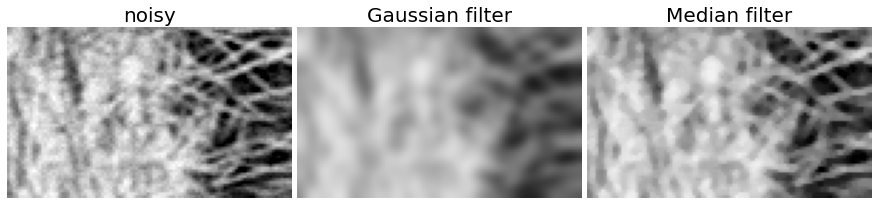

In [1]:
import numpy as np
import scipy
import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt

f = scipy.misc.chuck(gray=True)
f = f[230:290, 220:320]

# Create a noisy image
noisy = f + 0.4*f.std()*np.random.random(f.shape)

# Reduce the noise using a gaussian
gauss_denoised = ndimage.gaussian_filter(noisy, 2)

# Reduce the noise using a median filter
med_denoised = ndimage.median_filter(noisy, 3)


plt.figure(figsize=(12,2.8))

plt.subplot(131)
plt.imshow(noisy, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('noisy', fontsize=20)
plt.subplot(132)
plt.imshow(gauss_denoised, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('Gaussian filter', fontsize=20)
plt.subplot(133)
plt.imshow(med_denoised, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('Median filter', fontsize=20)

plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0,
                    right=1)
plt.show()

## Feature extraction

### Edge detection: sobel filter

In [ ]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

im = np.zeros((256, 256))
im[64:-64, 64:-64] = 1

im = ndimage.rotate(im, 15, mode='constant')
im = ndimage.gaussian_filter(im, 8)

sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.figure(figsize=(16, 5))
plt.subplot(141)
plt.imshow(im, cmap=plt.cm.gray)
plt.axis('off')
plt.title('square', fontsize=20)
plt.subplot(142)
plt.imshow(sx)
plt.axis('off')
plt.title('Sobel (x direction)', fontsize=20)
plt.subplot(143)
plt.imshow(sy)
plt.axis('off')
plt.title('Sobel (y direction)', fontsize=20)
plt.subplot(144)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel filter', fontsize=20)



plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=0.9)

plt.show()

## In class exercise:


* Slice/crop the image
* Add a white mask to the image
* Rotate tthe image
* Flip the image
* Apply a blurry filter
* Apply a sobel filter
    * Use scipy sobel and scikit image sobel over the same image. What are the differences?